# Configuracion y uso de API Binance con Python

In [3]:
from binance import Client

In [11]:
import pandas as pd

In [6]:
API_KEY = "Ly5s0rOFZ08LDxqyD4IYAbK3GgpRj4nC9s2299fsmnK9TD1nZkSS9GQCImxmE9NW"
API_SECRET = "GvPwqiu5N8DLwUy0819JE1eCycvLPXS3dR9DHiwmVkW32FGwDURyOi2i5fJdpw1H"

In [7]:
client = Client(API_KEY, API_SECRET) # Conexion con la API

In [8]:
print(client.ping()) # verify correct connection to API

{}


## Get info of the all coin tickers and price

In [12]:
coin_info = client.get_all_tickers() # get info of the all coin tickers and price

In [13]:
df = pd.DataFrame(coin_info)

In [17]:
df.tail()

,symbol,price
2153,SSVUSDT,39.86000000
2154,LQTYUSDT,2.03900000
2155,LQTYBTC,0.00009116
2156,AMBUSDT,0.02141000
2157,BETHUSDT,1533.18000000


In [78]:
df.set_index("symbol")

,price
symbol,
ETHBTC,0.069903
LTCBTC,0.004020
BNBBTC,0.012955
NEOBTC,0.000517
QTUMETH,0.001938
...,...
SSVUSDT,39.860000
LQTYUSDT,2.039000
LQTYBTC,0.000091


In [35]:
df["price"] = df["price"].astype("float")# Se convierte la columna a float
type(df["price"][0])


numpy.float64

In [79]:
df.index = df.index.astype("string")

In [38]:
df.head()

,symbol,price
0,ETHBTC,0.069903
1,LTCBTC,0.004020
2,BNBBTC,0.012955
3,NEOBTC,0.000517
4,QTUMETH,0.001938


In [88]:
df2 = pd.DataFrame(coin_info)

In [89]:
df2.loc[1:10,"price"]

1     0.00402000
2     0.01295500
3     0.00051700
4     0.00193800
5     0.00080900
6     0.00001722
7     0.00028900
8     0.07908100
9     0.00013940
10    0.18540000
Name: price, dtype: object

In [90]:
df.loc[:]

,symbol,price
0,ETHBTC,0.069903
1,LTCBTC,0.004020
2,BNBBTC,0.012955
3,NEOBTC,0.000517
4,QTUMETH,0.001938
...,...,...
2153,SSVUSDT,39.860000
2154,LQTYUSDT,2.039000
2155,LQTYBTC,0.000091
2156,AMBUSDT,0.021410


In [94]:
df2.loc[df2["symbol"]=="BTCUSDT"]

,symbol,price
11,BTCUSDT,22317.66000000


## Get historical price

In [155]:
asset="BTCUSDT"
start="2022.11.1"
end="2023.3.1"
timeframe="1d"

In [156]:
df_btc = pd.DataFrame(client.get_historical_klines(asset,timeframe,start,end))

In [157]:
df_btc.tail()

,0,1,2,3,4,5,6,7,8,9,10,11
116,1677283200000,23184.04000000,23219.13000000,22722.00000000,23157.07000000,191311.81010000,1677369599999,4406286300.27211680,9124568,94440.13964000,2175283940.90413120,0
117,1677369600000,23157.07000000,23689.99000000,23059.18000000,23554.85000000,202323.73623000,1677455999999,4716158181.22558950,9506015,101003.39278000,2354572412.69006830,0
118,1677456000000,23554.85000000,23897.99000000,23106.77000000,23492.09000000,283706.08590000,1677542399999,6659785788.32937360,11754195,141360.04845000,3318353869.99525000,0
119,1677542400000,23492.09000000,23600.00000000,23020.97000000,23141.57000000,264140.99894000,1677628799999,6172930936.03733470,9568743,131200.82704000,3066249880.67031860,0
120,1677628800000,23141.57000000,24000.00000000,23020.03000000,23628.97000000,315287.41737000,1677715199999,7441571085.49540830,9390487,157961.92667000,3728256787.11009410,0


In [158]:
df_btc = df_btc.iloc[:,:6]# recortamos la cantidad de columnas del dataframe

In [159]:
df_btc.columns = ["Date","Open","High", "Low", "Close", "Volume"] # Cambiamos el nombre de las columnas

In [160]:
df_btc.head()

,Date,Open,High,Low,Close,Volume
0,1667260800000,20490.74000000,20700.00000000,20330.74000000,20483.62000000,279932.43771000
1,1667347200000,20482.81000000,20800.00000000,20048.04000000,20151.84000000,373716.27299000
2,1667433600000,20151.84000000,20393.32000000,20031.24000000,20207.82000000,319185.15440000
3,1667520000000,20207.12000000,21302.05000000,20180.96000000,21148.52000000,453694.39165000
4,1667606400000,21148.52000000,21480.65000000,21080.65000000,21299.37000000,245621.98525000


In [161]:
df_btc = df_btc.set_index("Date") #Seleccionamos como index la columna Date

In [162]:
df_btc.index = pd.to_datetime(df_btc.index, unit="ms") #Cambiamos el formato de la fecha

In [163]:
df_btc = df_btc.astype("float") #convertimos los valores de objects a float

In [164]:
df_btc.describe()

,Open,High,Low,Close,Volume
count,121.000000,121.000000,121.000000,121.000000,121.000000
mean,19449.597934,19813.519008,19117.735372,19475.578843,263359.793041
std,2978.481031,3095.455382,2909.929184,3001.288540,112452.679447
min,15781.290000,16315.000000,15476.000000,15781.290000,96925.413740
25%,16813.160000,16972.830000,16559.850000,16812.080000,179094.283050
50%,17602.450000,18000.000000,17146.340000,17601.150000,251385.849250
75%,22762.520000,23180.000000,22422.000000,22783.550000,315287.417370
max,24843.890000,25250.000000,24430.000000,24842.200000,760705.362783


## Visualize the Data

In [165]:
import mplfinance as mpl

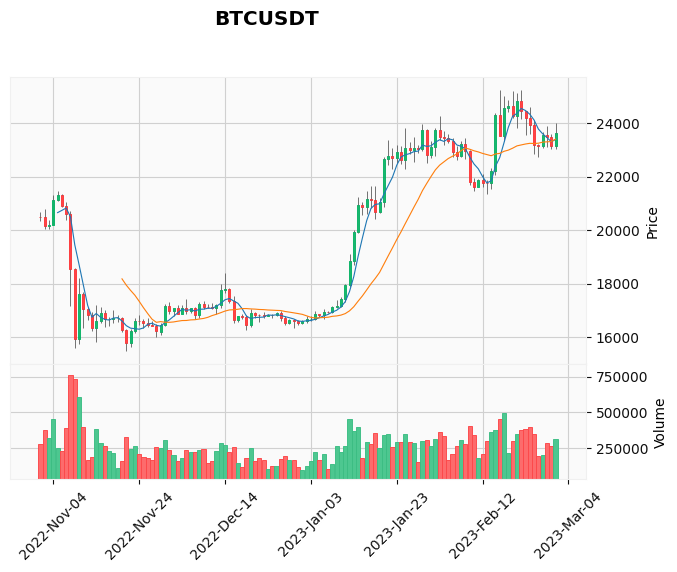

In [170]:
mpl.plot(df_btc,
         title= "BTCUSDT",
         type="candle",
         style = "yahoo",
         volume = True,
         mav = (5,20),
         show_nontrading = True,
        )